# Tutorial

This tutorial implements the flexible state-switching Hawkes processes (FS-Hawkes). It includes both simulation and statistical inference. 

## Vanilla Multivariate Hawkes Processes

An $M$-dimensional multivariate HP consists of $M$ sequences of random timestamps $\{\{t_n^i \}_{n=1}^{N_i}\}_{i=1}^M$ in the observation window $[0,T]$ where $t_n^i$ is the time of $n$-th event on $i$-th dimension, $M$ is the number of dimensions and $N_i$ is the number of events in the $i$-th dimension. A point process can be identified by its counting process $N(t)=\sum_{n}I(t_n<t)$ where $I(\cdot)$ is the indicator function. The conditional intensity $\lambda(t\mid\mathcal{H}_t)$ is defined as $\lambda(t\mid\mathcal{H}_t)dt=p(N(t+dt)-N(t)=1\mid\mathcal{H}_t)$ where $\mathcal{H}_t$ is the historical information before $t$. In the sequel, we use $\lambda^*(t)$ to represent the conditional intensity $\lambda(t\mid\mathcal{H}_t)$ for short. The $i$-th dimensional conditional intensity is designed as

$$\lambda_i^*(t)=\mu_i+\sum_{j=1}^M\sum_{t_n^j<t}f_{ij}(t-t_n^j),$$

where $\mu_i$ is the base intensity and $f_{ij}(\cdot)$ is the causal influence function from dimension $j$ to dimension $i$. To ease inference, $f_{ij}(\cdot)$ is typically assumed to be exponential decay or power law decay. The summation over past events and dimensions leads to the self- and mutual-excitation as the occurrence of past events within and across dimensions increases the future intensity. 

## Flexible State-Switching Hawkes Processes

We propose the FS-Hawkes to enrich the vanilla HPs with flexible influence functions, inhibitory effects and time-varying parameters. An $M$-dimensional FS-Hawkes consists of $M$ sequences of random timestamps and their corresponding states $D=\{\{\{t_n^i, z(t_n^i)\}_{n=1}^{N_i}\}_{i=1}^M, z(T)\}$ in the observation window $[0,T]$. 

In the FS-Hawkes, we introduce a state process $z(t)$ that takes values in a discrete finite state space $\mathcal{Z}=\{1,\ldots,K\}$ to represent the system state. We establish an endogenous Markov state process which is coupled with the point processes to form a closed-loop interaction. Reciprocally, the underlying parameters of point processes depend on the current system state; at the meantime, the state process switches only when an event occurs on point processes by a state-transition matrix depending on the event type. 

Given a set of state-transition matrices $\Phi=\{{\Phi}_{1},\ldots,{\Phi}_{M}\}$ with ${\Phi}_{i}$ being a $K\times K$ transition probability matrix for the $i$-th dimension (type), the transition probability of $z(t)$ at event timestamp $t_n^i$ is

$$p(z({t_n^i}^+)=k'\mid z(t_n^i)=k)=\phi_{i}(k,k'),$$

where we assume the state process $z(t)$ is left continuous $\lim_{t\to c^-}z(t)= z(c)$ and $z({t_n^i}^+)$ is the right limit of $z({t_n^i})$. $\phi_{i}(k,k')$ with $k,k'\in\{1,\ldots,K\}$ is the entry of ${\Phi}_{i}$. 

In turn, we define how the point processes depend on the state process. We establish a nonlinear HP variant with the excitation-inhibition-mixture influence functions depending on the system state. The $i$-th dimensional conditional intensity of FS-Hawkes is defined as 

$$\lambda_i^*(t,z(t))=\overline{\lambda}_i\sigma(h_i(t,z(t))),\ \ \ h_i(t,z(t))=\mu_i^{z(t)}+\sum_{j=1}^M\sum_{t_n^j<t}f_{ij}^{z(t)}(t-t_n^j),$$

where $h_i(t,z(t))$ is a real-valued state-dependent activation passed through a logistic function $\sigma(\cdot)$ to guarantee the non-negativity of intensity and then scaled by an upper-bound $\overline{\lambda}_i$. $\mu_i^{z(t)}$ and $f_{ij}^{z(t)}$ are the $z(t)$-state base activation and influence function which can be negative. 

To be flexible, $f_{ij}^{z(t)}$ is assumed to be a mixture function $f_{ij}^{z(t)}(\cdot)=\sum_{b=1}^B w_{ijb}^{z(t)}\widetilde{f}_b(\cdot)$ where $\{\widetilde{f}_b\}_{b=1}^B$ are predefined basis functions and $w_{ijb}^{z(t)}$ is the state-dependent mixture weight characterizing the influence from $j$-th dimension to $i$-th dimension by $b$-th basis function in the $z(t)$ state. Therefore, the $i$-th dimensional activation can be rewritten in a vector form

$$h_i(t,z(t))=\mu_i^{z(t)}+\sum_{j=1}^M\sum_{b=1}^B w_{ijb}^{z(t)}F_{jb}(t)={\mathbf{w}_{i}^{z(t)}}^\top\cdot\mathbf{F}(t),$$

where $F_{jb}(t)=\sum_{t_n^j<t}\widetilde{f}_{b}(t-t_n^j)$ is $j$-th dimensional cumulative influence on $t$ by $b$-th basis function and can be precomputed; $\mathbf{w}_{i}^{z(t)}=[\mu_i^{z(t)}, w_{i11}^{z(t)},\dotsc, w_{iMB}^{z(t)}]^\top$ and $\mathbf{F}(t)=[1, F_{11}(t), \dotsc, F_{MB}(t)]^\top$. The basis functions are assumed to be the scaled shifted Beta densities on the support $[0,T_f]$ as the inference will be free from edge effects. 

Combining the state process and point processes, we obtain the FS-Hawkes. The FS-Hawkes successfully addresses three limitations, as its influence functions are flexible, its influence effect can be inhibitive and its underlying parameters are time-varying. The FS-Hawkes' parameters comprise (1) the dimension-dependent state-transition matrices, (2) the intensity upper-bounds and (3) the state-dependent activation weights, which we write as ${\theta}=\{\{{\Phi}_i\}_{i=1}^M,\{\overline{\lambda}_i\}_{i=1}^M,\{\mathbf{w}_{i}^k\}_{i,k=1}^{M,K}\}$. 

In the paper, we present an efficient Gibbs sampler and a mean-field variational inference algorithm for Bayesian inference on FS-Hawkes, by using latent variable augmentation techniques. Please refer to the paper for more details. 

## Synthetic Data

From the `fs_hawkes_beta` module, we import the `FSHawkesBeta` class. We set the number of states (Z), dimensions (D) and basis functions (B). We initialise an instance of FS-Hawkes with 2 dimensions, 2 states and 2 basis functions.

In [293]:
import numpy as np
import pandas as pd
import seaborn as sns # for plot
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False}) # set seaborn style
import matplotlib.pyplot as plt # for plot
from fs_hawkes_beta import FSHawkesBeta
from scipy.stats import beta
from scipy.stats import multivariate_normal
from scipy.stats import gamma
from scipy.stats import dirichlet

In [234]:
number_of_states=2
number_of_dimensions=2
number_of_basis=2
toy_model = FSHawkesBeta(number_of_states,number_of_dimensions,number_of_basis)

**We use D, Z and B in brackets to indicate the dimension of parameter.**
We input the parameters: the intensity upperbound $\bar{\lambda}=[2,2]$ (D); the base activation at two states $\mu=[[1,1],[0,0]]$ (Z,D); the parameters of basis functions (beta densities) $\text{Beta}(a=50,b=50,\text{shift}=\{-2,0\})$ (B,3); the influence weight at two states $W=[[[[1,0.5],[-0.5,-0.25]],[[-0.25,-0.5],[0.5,1]]],[[[0.5,1],[-0.25,-0.5]],[[-0.5,-0.25],[1,0.5]]]]$ (Z,D,D,B); the support of basis functions (the scale of beta densities) $T_\phi=6$; the state transition matrixes $P=[[[0.99,0.01],[0.01,0.99]],[[0.99,0.01],[0.01,0.99]]]$ (D,Z,Z). 

In [252]:
beta_ab=np.array([[50,50,-2],[50,50,0]])
lamda_ub=np.array([2,2])
base_activation=np.array([[1,1],[0,0]])
weight=np.array([[[[1,0.5],[-0.5,-0.25]],[[-0.25,-0.5],[0.5,1]]],[[[0.5,1],[-0.25,-0.5]],[[-0.5,-0.25],[1,0.5]]]])
T_phi=6
P=np.array([[[0.99,0.01],[0.01,0.99]],[[0.99,0.01],[0.01,0.99]]])

In [236]:
toy_model.set_hawkes_hyperparameters(beta_ab, T_phi)
toy_model.set_hawkes_parameters(lamda_ub, base_activation, weight, P)

### Simulation

We simulate two sets of data as the training/test data. Both the training and test datasets are on $[0,T=2000]$. `points_hawkes` is the timestamps on each dimension; `states` is the state sequence on $[0,T]$; `states_n` is the states of timestamps on each dimension. 

In [237]:
T=2000
T_test=2000
# points_hawkes,states,states_n = toy_model.simulation(T, P_0=[0.5,0.5]) # P_0 is the distribution of state at t=0
# points_hawkes_test,states_test,states_n_test = toy_model.simulation(T_test, P_0=[0.5,0.5])

You can simulate the synthetic data by the above, or load our synthetic data directly.
The basis functions used for simulation are assumed to be known for inference, which are $\text{Beta}(a=50,b=50,\text{shift}=\{-2,0\})$ with support $[0,T_{\phi}=6]$. Please refer to the paper for more details about experiments. 

In [238]:
df=pd.read_csv('./synthetic_data.csv',index_col=0)
points_hawkes=[]
for i in range(2):
    points_hawkes.append(list(df.iloc[i].values[~np.isnan(df.iloc[i].values)]))

df=pd.read_csv('./synthetic_data_states_n.csv',index_col=0)
states_n=[]
for i in range(2):
    states_n.append(list(df.iloc[i].values[~np.isnan(df.iloc[i].values)].astype(int)))

df=pd.read_csv('./synthetic_data_states.csv',index_col=0)
states=list(df['0'])

df=pd.read_csv('./synthetic_data_test.csv',index_col=0)
points_hawkes_test=[]
for i in range(2):
    points_hawkes_test.append(list(df.iloc[i].values[~np.isnan(df.iloc[i].values)]))

df=pd.read_csv('./synthetic_data_states_n_test.csv',index_col=0)
states_n_test=[]
for i in range(2):
    states_n_test.append(list(df.iloc[i].values[~np.isnan(df.iloc[i].values)].astype(int)))

df=pd.read_csv('./synthetic_data_states_test.csv',index_col=0)
states_test=list(df['0'])

### Inference: Gibbs Sampler

We use the Gibbs sampler to perform inference. The input arguments are training data: `points_hawkes`,`states`,`states_n`; test data: `points_hawkes_test`,`states_test`,`states_n_test`; the end time of training data: `T` and test data: `T_test`; the diagonal variance of the Gaussian prior: `var_prior`; the hyperparameter of the dirichlet prior: `alpha_prior`; the number of grid nodes `num_grid` on \[0,T\] and `num_grid_test` on \[0,T_test\], the number of Gibbs loops: `num_iter`. 

In [239]:
lamda_ub_estimated_list_gibbs,W_estimated_list_gibbs,P_estimated_list_gibbs,logl_list_gibbs,logl_test_list_gibbs\
=toy_model.Gibbs(points_hawkes,states,states_n,points_hawkes_test,states_test,states_n_test,\
                 T,T_test,var_prior=1,alpha_prior=1,num_grid=T*100,num_grid_test=T_test*100,num_iter=200)

The output `lamda_ub_estimated_list_gibbs` is the samples of intensity upperbounds, `W_estimated_list_gibbs[:,:,0]` is the samples of base activation, `W_estimated_list_gibbs[:,:,1:]` is the samples of influence weight, `P_estimated_list_gibbs` is the samples of state transition matrixes,`logl_list_gibbs` and `logl_test_list_gibbs` are the training and test log-likelihood along Gibbs loops. 

We evaluate the mean of parameters by the last 100 samples. 

In [245]:
lamda_ub_estimated_mean_gibbs=np.mean(lamda_ub_estimated_list_gibbs[-100:],axis=0)
W_estimated_mean_gibbs=np.mean(W_estimated_list_gibbs[-100:],axis=0)
P_estimated_mean_gibbs=np.mean(P_estimated_list_gibbs[-100:],axis=0)

In [246]:
lamda_ub_estimated_mean_gibbs, W_estimated_mean_gibbs[:,:,0], W_estimated_mean_gibbs[:,:,1:], P_estimated_mean_gibbs

(array([1.95701403, 2.09528811]),
 array([[ 1.07074817,  0.62933591],
        [ 0.1001333 , -0.04873695]]),
 array([[[ 0.97643729,  0.37557445, -0.52286063, -0.21578007],
         [-0.21985205, -0.5176406 ,  0.48676278,  1.5799737 ]],
 
        [[ 0.51878093,  0.91659414, -0.23043523, -0.50828922],
         [-0.53582485, -0.25524436,  0.83119381,  0.57858711]]]),
 array([[[0.98036312, 0.01963688],
         [0.00922396, 0.99077604]],
 
        [[0.99029491, 0.00970509],
         [0.00998152, 0.99001848]]]))

Now let us visualize the estiamted influence functions $f_{ij}^{z}$ where $i$ is the target dimension, $j$ is the source dimension and $z$ is the state. 

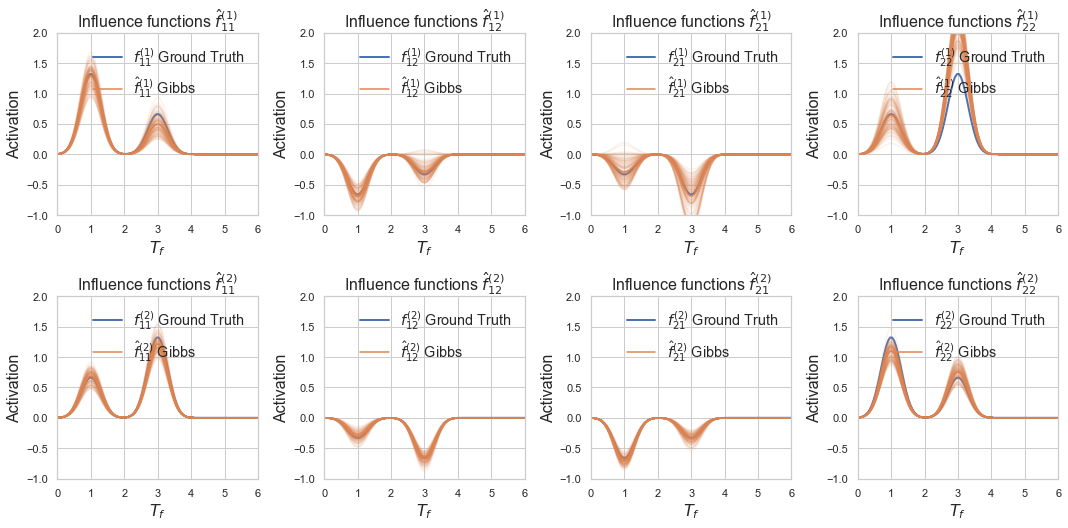

In [242]:
sns.set()
sns.set_style("whitegrid")
fig=plt.figure(1,figsize=(15,7.5))
for z in range(number_of_states):
    for i in range(number_of_dimensions):
        for j in range(number_of_dimensions):
            axs=fig.add_subplot(2,4,z*4+i*2+j*1+1)
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),_,gt=True),linewidth=2,label='$f_{%s%s}^{(%s)}$ Ground Truth'%(i+1,j+1,z+1))
            for k in range(100):
                axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_list_gibbs[-1-k]),color=sns.color_palette()[1],alpha=0.1)
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_mean_gibbs),color=sns.color_palette()[1],label='$\hat{f}_{%s%s}^{(%s)}$ Gibbs'%(i+1,j+1,z+1))
            plt.legend(ncol=1,loc='upper right',frameon=False,fontsize='large')
            plt.xlabel('$T_f$',fontsize=16)
            plt.ylabel('Activation',fontsize=16)
            plt.xlim(0,6)
            plt.ylim(-1,2)
            plt.title('Influence functions $\hat{f}_{%s%s}^{(%s)}$'%(i+1,j+1,z+1),fontsize=16)
plt.tight_layout()
plt.show()

### Inference: Mean-Field Variational Inference

We use the mean-field to perform inference. The input arguments are training data: `points_hawkes`,`states`,`states_n`; test data: `points_hawkes_test`,`states_test`,`states_n_test`; the end time of training data: `T` and test data: `T_test`; the diagonal variance of the Gaussian prior: `var_prior`; the hyperparameter of the dirichlet prior: `alpha_prior`; the number of gaussian quadrature nodes `num_gq_seg` on each state-segment of training data and `num_gq_seg_test` on each state-segment of test data, the number of mean-field loops: `num_iter`. 

In [243]:
alpha_estimated_mf,mean_W_estimated_mf,cov_W_estimated_mf,dir_alpha_estimated_mf,logl_list_mf,logl_test_list_mf\
=toy_model.MeanField(points_hawkes,states,states_n,points_hawkes_test,states_test,states_n_test,\
                     T,T_test,var_prior=1,alpha_prior=1,num_gq_seg=100,num_gq_seg_test=100,num_iter=200)

The output `alpha_estimated_mf` is the location parameter of posterior (Gamma) of intensity upperbounds, `mean_W_estimated_mf` and `cov_W_estimated_mf` are the mean and covariance of posterior (Gaussian) of influence weight, `dir_alpha_estimated_mf` is the parameter of posterior (Dirichlet) of state transition matrixes, `logl_list_mf` and `logl_test_list_mf` are the training and test log-likelihood (evaluated by the mean) along mean-field loops. 

We draw 100 samples from the posterior of these parameters for the following plot. 

In [247]:
W_estimated_list_mf=np.zeros((100,number_of_states,number_of_dimensions,number_of_dimensions*number_of_basis+1))
for i in range(100):
    for z in range(number_of_states):
        for d in range(number_of_dimensions):
            W_estimated_list_mf[i][z][d]=multivariate_normal(mean_W_estimated_mf[z][d],cov_W_estimated_mf[z][d]).rvs()
lamda_ub_estimated_list_mf=np.zeros((100,number_of_dimensions))
for i in range(100):
    lamda_ub_estimated_list_mf[i]=gamma(a=alpha_estimated_mf,scale=1/T).rvs()
P_estimated_list_mf=np.zeros((100,number_of_dimensions,number_of_states,number_of_states))
for i in range(100):
    for j in range(number_of_dimensions):
        for k in range(number_of_states):
            P_estimated_list_mf[i][j][k]=dirichlet(dir_alpha_estimated_mf[j][k]).rvs()

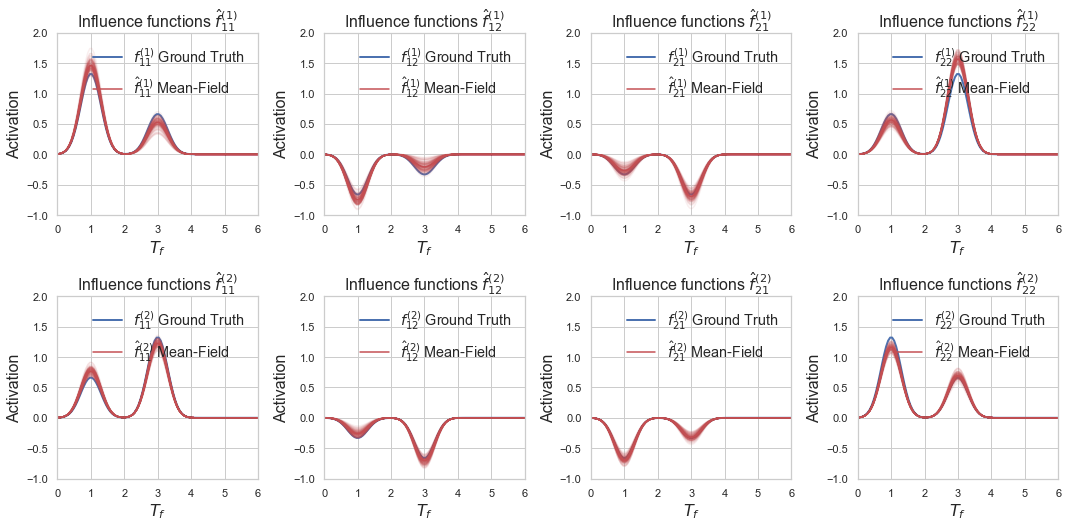

In [248]:
sns.set()
sns.set_style("whitegrid")
fig=plt.figure(1,figsize=(15,7.5))
for z in range(number_of_states):
    for i in range(number_of_dimensions):
        for j in range(number_of_dimensions):
            axs=fig.add_subplot(2,4,z*4+i*2+j*1+1)
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),_,gt=True),linewidth=2,label='$f_{%s%s}^{(%s)}$ Ground Truth'%(i+1,j+1,z+1))
            for k in range(100):
                axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),W_estimated_list_mf[k]),color=sns.color_palette()[3],alpha=0.09)
            axs.plot(np.linspace(0,T_phi,100),toy_model.influence_function_estimated\
                     (z,i,j,np.linspace(0,T_phi,100),mean_W_estimated_mf),color=sns.color_palette()[3],label='$\hat{f}_{%s%s}^{(%s)}$ Mean-Field'%(i+1,j+1,z+1))
            plt.legend(ncol=1,loc='upper right',frameon=False,fontsize='large')
            plt.xlabel('$T_f$',fontsize=16)
            plt.ylabel('Activation',fontsize=16)
            plt.xlim(0,6)
            plt.ylim(-1,2)
            plt.title('Influence functions $\hat{f}_{%s%s}^{(%s)}$'%(i+1,j+1,z+1),fontsize=16)
plt.tight_layout()
plt.show()

Let us visualize the log-likelihood curves along iterations of Gibbs and Mean-Field. 

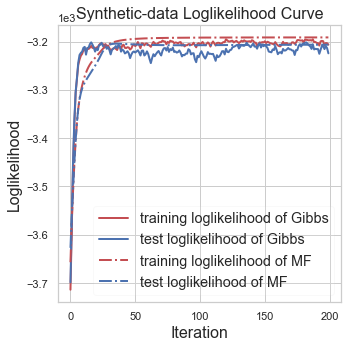

In [251]:
sns.set()
sns.set_style("whitegrid")
plt.figure(1,figsize=(5,5))
axs=plt.subplot(111)
axs.plot(range(len(logl_list_gibbs)),logl_list_gibbs,'r-',linewidth=2,label='training loglikelihood of Gibbs')
axs.plot(range(len(logl_test_list_gibbs)),logl_test_list_gibbs,'b-',linewidth=2,label='test loglikelihood of Gibbs')
axs.plot(range(len(logl_list_mf)),logl_list_mf,'r-.',linewidth=2,label='training loglikelihood of MF')
axs.plot(range(len(logl_test_list_mf)),logl_test_list_mf,'b-.',linewidth=2,label='test loglikelihood of MF')
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loglikelihood',fontsize=16)
plt.title('Synthetic-data Loglikelihood Curve',fontsize=16)
plt.legend(framealpha=0.1,fontsize='large')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.show()

## Real Data

In this section, we use the proposed FS-Hawkes to conduct experiments on two traditional Hawkes process application domains: seismology (SCE) and high frequency finance (INTC). Considering the efficiency, the inference of FS-Hawkes is performed by the mean-field algorithm. Please refer to the paper for more details about experiments. 

### SCE

In [258]:
df=pd.read_csv('./earthquake_training.csv',index_col=0)
points_sce_training=[]
points_sce_training.append(df['timestamp(day)'].to_list())
states_n_sce_training=[]
states_n_sce_training.append(df['state'].to_list())
states_sce_training=df['state'].to_list()+[0]

df=pd.read_csv('./earthquake_test.csv',index_col=0)
points_sce_test=[]
points_sce_test.append(df['timestamp(day)'].to_list())
states_n_sce_test=[]
states_n_sce_test.append(df['state'].to_list())
states_sce_test=df['state'].to_list()+[0]

In [259]:
number_of_states_sce=2
number_of_dimensions_sce=1
number_of_basis_sce=12
sce_model = FSHawkesBeta(number_of_states_sce,number_of_dimensions_sce,number_of_basis_sce)

In [261]:
beta_ab_sce=np.array([[1,100,0]]+[[50, 50, -5+1*i] for i in range(11)])
T_phi_sce=10
sce_model.set_hawkes_hyperparameters(beta_ab_sce, T_phi_sce)

In [264]:
T_sce=np.ceil(max([points_sce_training[i][-1] for i in range(number_of_dimensions_sce)]))
T_test_sce=np.ceil(max([points_sce_test[i][-1] for i in range(number_of_dimensions_sce)]))

In [266]:
%%time
alpha_estimated_mf_sce,mean_W_estimated_mf_sce,cov_W_estimated_mf_sce,dir_alpha_estimated_mf_sce,logl_list_mf_sce,logl_test_list_mf_sce\
=sce_model.MeanField(points_sce_training,states_sce_training,states_n_sce_training,points_sce_test,states_sce_test,states_n_sce_test,\
                     T_sce,T_test_sce,var_prior=1,alpha_prior=1,num_gq_seg=100,num_gq_seg_test=100,num_iter=200)

Wall time: 7min 59s


In [267]:
max(logl_test_list_mf_sce)/len(points_sce_test[0])

-2.607333018274896

### INTC

In [294]:
df=pd.read_csv('./INTC_training.csv',index_col=0)
points_intc_training=[]
points_intc_training.append(df.loc[df['EventType']==1,'Time'].to_list())
points_intc_training.append(df.loc[df['EventType']==2,'Time'].to_list())
states_n_intc_training=[]
states_n_intc_training.append(df.loc[df['EventType']==1,'state'].to_list())
states_n_intc_training.append(df.loc[df['EventType']==2,'state'].to_list())
states_intc_training=df['state'].to_list()+[1]

df=pd.read_csv('./INTC_test.csv',index_col=0)
points_intc_test=[]
points_intc_test.append(df.loc[df['EventType']==1,'Time'].to_list())
points_intc_test.append(df.loc[df['EventType']==2,'Time'].to_list())
states_n_intc_test=[]
states_n_intc_test.append(df.loc[df['EventType']==1,'state'].to_list())
states_n_intc_test.append(df.loc[df['EventType']==2,'state'].to_list())
states_intc_test=df['state'].to_list()+[1]

In [295]:
number_of_states_intc=3
number_of_dimensions_intc=2
number_of_basis_intc=3
intc_model = FSHawkesBeta(number_of_states_intc,number_of_dimensions_intc,number_of_basis_intc)

In [296]:
beta_ab_intc=np.array([[50,50,-0.5+0.1*i] for i in range(3)])
T_phi_intc=1.0
intc_model.set_hawkes_hyperparameters(beta_ab_intc, T_phi_intc)

In [297]:
T_intc=np.ceil(max([points_intc_training[i][-1] for i in range(number_of_dimensions_intc)]))
T_test_intc=np.ceil(max([points_intc_test[i][-1] for i in range(number_of_dimensions_intc)]))

In [303]:
%%time
alpha_estimated_mf_intc,mean_W_estimated_mf_intc,cov_W_estimated_mf_intc,dir_alpha_estimated_mf_intc,logl_list_mf_intc,logl_test_list_mf_intc\
=intc_model.MeanField(points_intc_training,states_intc_training,states_n_intc_training,points_intc_test,states_intc_test,states_n_intc_test,\
T_intc,T_test_intc,var_prior=1,alpha_prior=1,num_gq_seg=500,num_gq_seg_test=500,num_iter=1000,initial_W_mean=np.load('./mean_W_init_intc.npy'))

Wall time: 9min 31s


In [304]:
max(logl_test_list_mf_intc)/sum([len(points_intc_test[i]) for i in range(number_of_dimensions_intc)])

1.419045033953565